# DeployAI services Task 5.2

## depai-yolov8-obb

The purpose of this notebook is to give a demonstration of the DeployAI services provided by Task 5.2. It will include examples demonstrating how to run Docker environments and showcase the application of a deep learning model for object detection in very high-resolution optical remote sensing images using YOLOv8 with Oriented Bounding Boxes.

You can find the service in the git: https://github.com/AlbughdadiM/depai-yolov8-obb, and part of this notebook contaned is taken from the same repo

### installation 

In [3]:
import os
localpath = os.getcwd()
print(localpath)

/home/vvatellis


In [2]:
import os
import subprocess

def clone_repo(repo_url):
    try:
        # Run the 'git clone' command to clone the repository from the given URL
        result = subprocess.run(
            ["git", "clone", repo_url],  
            check=True,  # Raises an exception if the 'git clone' command fails
            stdout=subprocess.PIPE,  # Captures the standard output of the command
            stderr=subprocess.PIPE   # Captures the standard error of the command
        )
        # Decode and print the command output (stdout) to the console
        print(result.stdout.decode())
        print("Repository cloned successfully.")  # Inform the user that cloning was successful
    except subprocess.CalledProcessError as e:
        # Handle errors by printing the error message (stderr) if the command fails
        print(f"Error occurred: {e.stderr.decode()}")


In [5]:
path_odd = "depai-yolov8-obb"

# This code checks if a specific path (path_odd) exists:
# - If the path does not exist, it clones a Git repository to that location by calling the clone_repo function.
# - If the path exists, it changes the current working directory to the specified path.
# Finally, it prints the full path to the repository, regardless of whether it was just cloned or already existed.

if not os.path.exists(path_odd):
     print(f"The path {path_odd} does not exist. Dowloading repo")
     # Example usage
     repo_url = "https://github.com/AlbughdadiM/depai-yolov8-obb.git"  
     clone_repo(repo_url)
         
if os.path.exists(path_odd):
    print(f"The path {path_odd} exists.")
    os.chdir(path_odd)
    print("Moved to path",os.getcwdb())

print(f"Path to repo: {os.path.join(localpath,path_odd)} ")

The path depai-yolov8-obb does not exist. Dowloading repo



Repository cloned successfully.
The path depai-yolov8-obb exists.
Moved to path b'/home/vvatellis/depai-yolov8-obb/depai-yolov8-obb'
Path to repo: /home/vvatellis/depai-yolov8-obb 


### Importance of `model_pb2_grpc.py` and `model_pb2.py` in gRPC

In gRPC, the files `model_pb2_grpc.py` and `model_pb2.py` are auto-generated from the `.proto` file, which defines the structure of the data and the services for remote procedure calls (RPC). These files are crucial for the following reasons:

- **`model_pb2.py`**: This file contains the message classes generated from the protobuf definitions. It is used for serializing and deserializing the structured data (messages) sent between the client and server.
- **`model_pb2_grpc.py`**: This file contains the client and server stubs required to initiate and handle gRPC communication. It allows the client to call remote methods on the server, and the server to respond to those calls.

Without these files, the gRPC services defined in the `.proto` file cannot be implemented or accessed in Python.

### What the Code Does




In [37]:
"""
This code checks whether the gRPC-generated files `model_pb2_grpc.py` and `model_pb2.py`
already exist in the directory. If both files are present, the program continues without 
generating new ones. If either file is missing, the code runs the `protoc` command using 
`grpc_tools` to generate these files from the `model.proto` file, ensuring that gRPC can 
communicate and function properly.
"""
if os.path.exists("model_pb2_grpc.py") and os.path.exists("model_pb2.py"):
    pass
else :
    subprocess.run("python3.10 -m grpc_tools.protoc -I. --python_out=. --grpc_python_out=. model.proto")

#### Model Overview:
The model is designed to detect a variety of objects in high-resolution images, including but not limited to:
* Planes
* Ships
* Storage Tanks
* Baseball Diamonds
* Tennis Courts
* Basketball Courts
* Ground Track Fields
* Harbors
* Bridges
* Large Vehicles
* Small Vehicles
* Helicopters
* Roundabouts
* Soccer Ball Fields
* Swimming Pools
* Container Cranes
* Airports
* Helipads

Each object is assigned a specific class ID (e.g., "plane" = 0, "ship" = 1, etc.), which the model uses to label the detected objects.

#### Detection Process:
The model processes the input image, identifies the presence of any of the objects listed above, and draws bounding boxes around them. Each detected object is assigned a unique bounding box, and the box's location is represented by coordinates in the image. The bounding boxes are color-coded based on the object's class ID, making it easy to distinguish between different types of objects visually.

In [9]:
import subprocess
import sys

# This code checks if a list of Python packages is installed:
# - The 'install_package' function installs a given package using pip if it's not already installed.
# - The 'check_and_install_packages' function iterates through a list of packages. If a package is not found, it installs it; otherwise, it prints that the package is already installed.
# This ensures that the required packages are available without manual installation.


def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def check_and_install_packages(packages):
    for package in packages:
        try:
            __import__(package)
            print(f"Package '{package}' is already installed.")
        except ImportError:
            print(f"Package '{package}' not found. Installing...")
            install_package(package)




In [10]:
packages_to_check = ["grpc","grpcio-tools"]  # Add your package names here
check_and_install_packages(packages_to_check)

Package 'grpc' is already installed.
Package 'grpcio-tools' not found. Installing...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Add a shell where checks if the docker exist and if it is an active image 

In [11]:
import subprocess

def is_container_running(image_name):
    """
    Check if a Docker container with the specified image name is running.
    - This function runs the 'docker ps' command with a filter to check if any container
      based on the given image is running.
    - If a running container is found, it returns True; otherwise, it returns False.
    """
    result = subprocess.run(["docker", "ps", "--filter", f"ancestor={image_name}", "--format", "{{.ID}}"], capture_output=True, text=True)
    return bool(result.stdout.strip())

def run_docker_image(image_name, container_name, additional_options=""):
    """
    Run a Docker container with the specified image name.
    - This function runs the 'docker run' command to start a new container based on the given image.
    - The container is run in detached mode ('-d'), with the specified container name, and
      additional Docker options can be passed as a string.
    """
    subprocess.run(["docker", "run", "-d", "--name=", container_name] + additional_options.split() + [image_name])



docker run -d --name=test-obb -v ./test-data:/data -p 8061:8061 object-detection:v0.1 \
docker run -d --name=test-lai -v ./test-data:/data -p 8063:8063 lai:v0.1 \
docker run -d --name=test-sam -v ./test-data:/data -p 8062:8061 sam:v0.1

In [12]:

image_name = "object-detection:v0.1"  # Replace with your Docker image name
container_name = "depai-yolov8"  # Replace with your desired container name
additional_options = "-v ./test-data:/data -p 8062:8061"  # Add any additional options for `docker run` command

if is_container_running(image_name):
    """
    Check if a Docker container with the specified image name is running.
    - This function runs the 'docker ps' command with a filter to check if any container
      based on the given image is running.
    - If a running container is found, it returns True; otherwise, it returns False.
    """
    print(f"The Docker image '{image_name}' is already running.")
else:
    """
    Run a Docker container with the specified image name.
    - This function runs the 'docker run' command to start a new container based on the given image.
    - The container is run in detached mode ('-d'), with the specified container name, and
      additional Docker options can be passed as a string.
    """
    print(f"The Docker image '{image_name}' is not running. Starting it now...")
    run_docker_image(image_name, container_name, additional_options)
    print(f"The Docker image '{image_name}' has been started.")

The Docker image 'object-detection:v0.1' is already running.


### How to use

We begin by visualizing the input data, which consists of high-resolution optical remote sensing images, to gain insights and ensure the data's quality before utilizing it in the machine learning model. This step is essential for verifying the integrity of the data and understanding its characteristics, which can enhance the effectiveness of the model's performance."

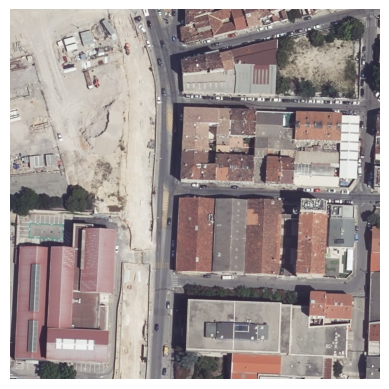

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and display the image
img = Image.open('test-data/patch_250.tif')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

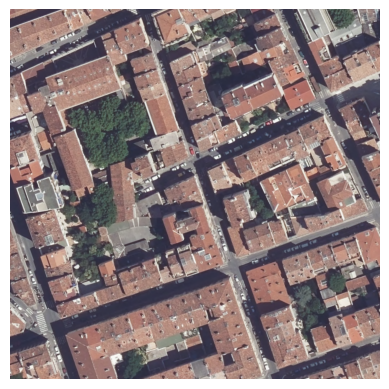

In [12]:
# Load and display the image
img = Image.open('test-data/patch_420.tif')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

#### Model Overview:
The model is designed to detect a variety of objects in high-resolution images, including but not limited to:
* Planes
* Ships
* Storage Tanks
* Baseball Diamonds
* Tennis Courts
* Basketball Courts
* Ground Track Fields
* Harbors
* Bridges
* Large Vehicles
* Small Vehicles
* Helicopters
* Roundabouts
* Soccer Ball Fields
* Swimming Pools
* Container Cranes
* Airports
* Helipads

Each object is assigned a specific class ID (e.g., "plane" = 0, "ship" = 1, etc.), which the model uses to label the detected objects.

#### Detection Process:
The model processes the input image, identifies the presence of any of the objects listed above, and draws bounding boxes around them. Each detected object is assigned a unique bounding box, and the box's location is represented by coordinates in the image. The bounding boxes are color-coded based on the object's class ID, making it easy to distinguish between different types of objects visually.

In [2]:
## Testing ##
import os
os.chdir('/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/pd2Files')
print(os.getcwd())

/mnt/sdd1/vvatellis/storage/DeployAi/webapp/depaiWebApp/pd2Files


In [3]:
import grpc
import modelYolov8_pb2 
import modelYolov8_pb2_grpc 

def run():
    channel = grpc.insecure_channel("localhost:8061")
    stub = modelYolov8_pb2_grpc.ImageProcessorStub(channel)
    # As we can see, the model accepts multiple images in a list
    response = stub.ProcessImage(
        modelYolov8_pb2.ImageRequest(  # pylint: disable=E1101
            input_image_paths=[
                "/data/data_yolov8_odd/patch_250.tif",
                "/data/data_yolov8_odd/patch_420.tif",
            ]
        )
    )
    print("Output Result Path: " + response.entries[0].result_path)
    print("Output Result Path: " + response.entries[1].result_path)


if __name__ == "__main__":
    run()


/mnt/sdd1/vvatellis/storage/DeployAi/webapp/depaiWebApp/pd2Files/modelYolov8_pb2_grpc.py:21: RuntimeWarning: The grpc package installed is at version 1.64.1, but the generated code in modelYolov8_pb2_grpc.py depends on grpcio>=1.65.4. Please upgrade your grpc module to grpcio>=1.65.4 or downgrade your generated code using grpcio-tools<=1.64.1. This warning will become an error in 1.66.0, scheduled for release on August 6, 2024.
  warnings.warn(


Output Result Path: /data/data_yolov8_odd/dff2e384-d052-45af-b394-5cb63456da38/patch_250.txt
Output Result Path: /data/data_yolov8_odd/dff2e384-d052-45af-b394-5cb63456da38/patch_420.txt


In [4]:
import os
import colorsys
import grpc
import pytest
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import tifffile as tiff


import importlib

import grpc, modelYolov8_pb2, modelYolov8_pb2_grpc  


def generate_class_colors(num_classes):
    hsv_colors = [(x * 1.0 / num_classes, 1.0, 1.0) for x in range(num_classes)]
    rgb_colors = [
        tuple(int(255 * y) for y in colorsys.hsv_to_rgb(*color)) for color in hsv_colors
    ]
    return rgb_colors


colors = generate_class_colors(18)
normalized_colors = [(r / 255.0, g / 255.0, b / 255.0) for r, g, b in colors]


def read_annotations(file_path):
    with open(file_path, "r") as file:  # pylint:disable=W1514
        annotations = []
        for line in file:
            values = line.strip().split()
            x1, y1, x2, y2, x3, y3, x4, y4 = map(
                lambda val: float(val) * 1025, values[1:-1]
            )

            category = values[0]
            annotations.append(
                {
                    "x1": x1,
                    "y1": y1,
                    "x2": x2,
                    "y2": y2,
                    "x3": x3,
                    "y3": y3,
                    "x4": x4,
                    "y4": y4,
                    "category": category,
                }
            )
    return annotations


def visualize_annotations(img_path, annotation_path, output_path):
    img = tiff.imread(img_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    annotations = read_annotations(annotation_path)
    for annotation in annotations:
        polygon = patches.Polygon(
            [
                (annotation["x1"], annotation["y1"]),
                (annotation["x2"], annotation["y2"]),
                (annotation["x3"], annotation["y3"]),
                (annotation["x4"], annotation["y4"]),
            ],
            closed=True,
            edgecolor=normalized_colors[int(annotation["category"])],
            linewidth=2,
            fill=False,
        )
        ax.add_patch(polygon)
        ax.axis("off")
    plt.savefig(output_path)


def grpc_stub():
    channel = grpc.insecure_channel("localhost:8061")
    stub = modelYolov8_pb2_grpc.ImageProcessorStub(channel)
    yield stub
    channel.close()



### Function Explanation: `runANDviualize()`

This function connects to a gRPC server to process multiple images and visualize the results. Here's a step-by-step breakdown:

1. **Connect to gRPC server:** The function establishes a connection to a local gRPC server on port `8061` to process images using a predefined image processing model.
2. **Send image requests:** The function sends a list of image file paths to the server for processing.
3. **Receive and validate the response:** It asserts that the processed images are received successfully and prints the output file paths for each processed image.
4. **Visualize the results:** For each processed image, it:
    - Loads the corresponding image and its annotations.
    - Displays the image and overlays polygonal bounding boxes based on the annotation coordinates.
    - The bounding boxes are color-coded according to the object category.
    - The function finally saves the visualized output as a PNG image.
5. **Output:** The paths of the saved output images are printed.

This function automates the process of image processing, visualization, and result saving, providing an easy way to inspect model outputs.


Output file: /data/data_yolov8_odd/d5f989c9-6b7c-4e2e-beb6-1b9c9f1e34cf/patch_250.txt
Output file: /data/data_yolov8_odd/d5f989c9-6b7c-4e2e-beb6-1b9c9f1e34cf/patch_420.txt
output /home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_yolov8_odd/outputpatch_250.png
output /home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_yolov8_odd/outputpatch_420.png


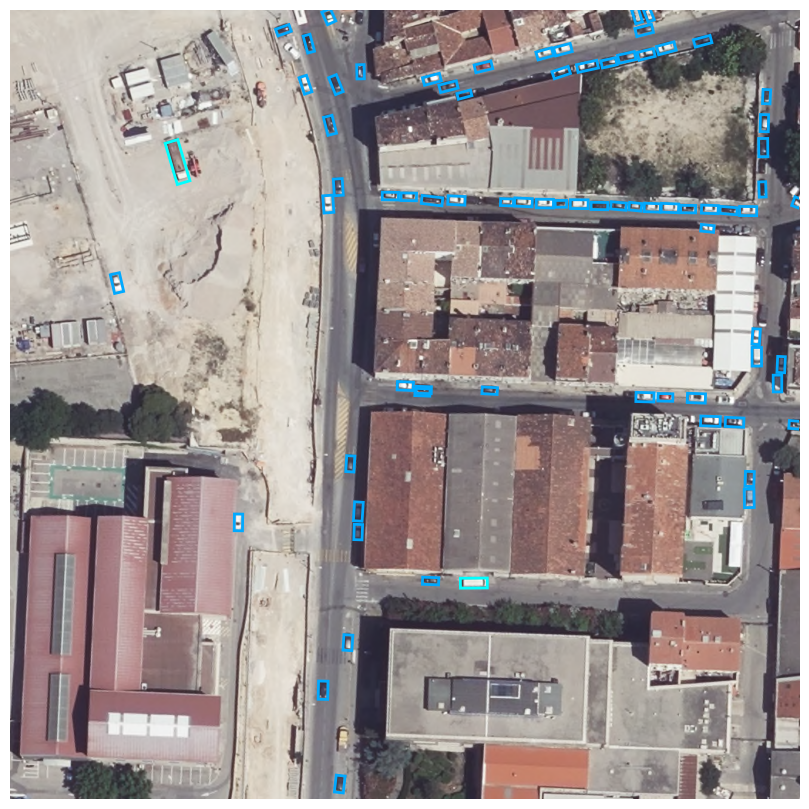

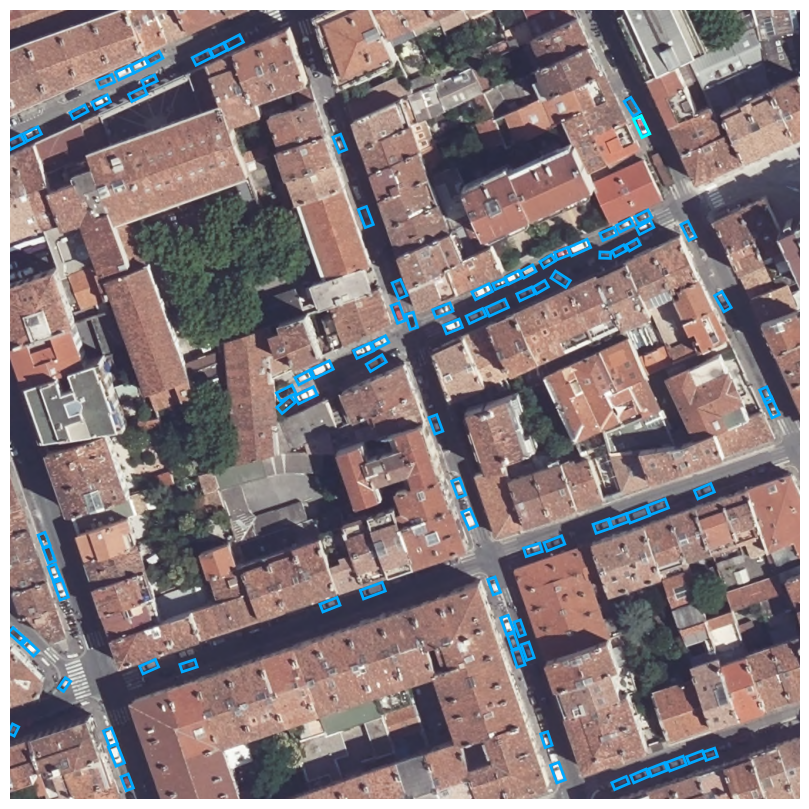

In [5]:
def runANDviualize():
    channel = grpc.insecure_channel("localhost:8061")
    stub = modelYolov8_pb2_grpc.ImageProcessorStub(channel)
    # As we can see, the model accepts multiple images in a list
    response = stub.ProcessImage(
        modelYolov8_pb2.ImageRequest(  # pylint: disable=E1101
            input_image_paths=[
                "/data/data_yolov8_odd/patch_250.tif",
                "/data/data_yolov8_odd/patch_420.tif",
            ]
        )
    )
    assert response.entries[0].processed is not None
    assert response.entries[1].processed is not None
    print("Output file: " + response.entries[0].result_path)
    print("Output file: " + response.entries[1].result_path)
    for res in response.entries:
        result_path = res.result_path
        #print(result_path)
        if result_path:
            fname = os.path.basename(result_path)
            local_result_path = os.path.join("/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData",
             os.path.relpath(result_path, "/data")
            )
            #print(local_result_path)
            img_path = os.path.join("/home/vvatellis/storage/DeployAi/depai-yolov8-obb","test-data" ,fname.split(".")[0] + ".tif")
            output_path = os.path.join("/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData","data_yolov8_odd","output" + fname.split(".")[0] + ".png")
            
            img = tiff.imread(img_path)
            img_width, img_height = img.shape[:2]

            # Set the figure size to match the image dimensions (assuming 100 DPI)
            dpi = 100
            fig_width = img_width / dpi
            fig_height = img_height / dpi

            # Create a figure and axes with specific dimensions (width, height in inches)
            fig, ax = plt.subplots(1, figsize=(fig_width, fig_height))
            ax.imshow(img)
            annotations = read_annotations(local_result_path)
            for annotation in annotations:
                polygon = patches.Polygon(
                    [
                        (annotation["x1"], annotation["y1"]),
                        (annotation["x2"], annotation["y2"]),
                        (annotation["x3"], annotation["y3"]),
                        (annotation["x4"], annotation["y4"]),
                    ],
                    closed=True,
                    edgecolor=normalized_colors[int(annotation["category"])],
                    linewidth=2,
                    fill=False,
                )
                ax.add_patch(polygon)
                ax.axis("off")
            # Save the figure
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        print("output",output_path)

if __name__ == "__main__":
    runANDviualize()

In [6]:
yolov8 = {
    'plane': (0, (255, 0, 0)),             # Red
    'ship': (1, (255, 84, 0)),             # Orange-Red
    'storage-tank': (2, (255, 170, 0)),    # Dark Orange
    'baseball-diamond': (3, (255, 255, 0)),# Yellow
    'tennis-court': (4, (170, 255, 0)),    # Yellow-Green
    'basketball-court': (5, (84, 255, 0)), # Lime Green
    'ground-track-field': (6, (0, 255, 0)),# Green
    'harbor': (7, (0, 255, 85)),           # Spring Green
    'bridge': (8, (0, 255, 169)),          # Medium Aquamarine
    'large-vehicle': (9, (0, 255, 255)),   # Cyan (Aqua)
    'small-vehicle': (10, (0, 169, 255)),  # Sky Blue
    'helicopter': (11, (0, 84, 255)),      # Dodger Blue
    'roundabout': (12, (0, 0, 255)),       # Blue
    'soccer-ball-field': (13, (84, 0, 255)),# Indigo
    'swimming-pool': (14, (170, 0, 255)),  # Purple
    'container-crane': (15, (255, 0, 255)),# Magenta (Fuchsia)
    'airport': (16, (255, 0, 170)),        # Deep Pink
    'helipad': (17, (255, 0, 85))          # Hot Pink
}

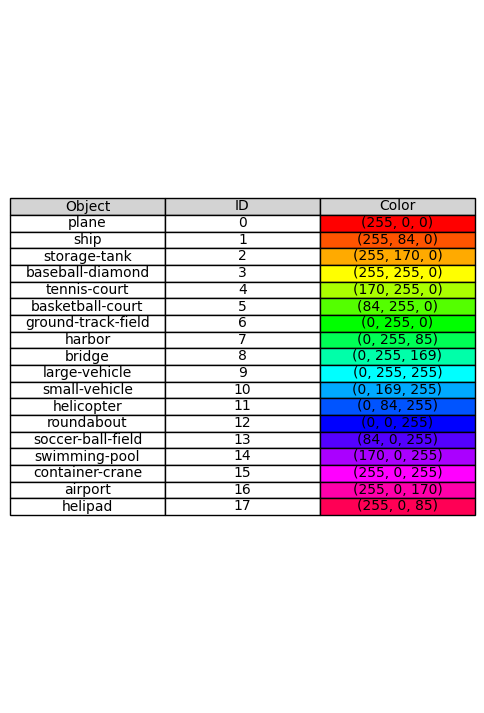

In [7]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd

# Create data for the table: Object, ID, and Color
data = []
for obj, (obj_id, color) in yolov8.items():
    data.append([obj, obj_id, color])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Object", "ID", "Color"])

# Create a plot
fig, ax = plt.subplots(figsize=(6, len(yolov8) / 2))  # Adjust figure size based on the number of objects
ax.axis('tight')
ax.axis('off')

# Create the table
the_table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     loc='center',
                     cellLoc='center',
                     colColours=['lightgray', 'lightgray', 'lightgray'])

# Set color in the last column cells
for i, color in enumerate(df['Color']):
    # Normalize the color values from (0-255) to (0-1)
    normalized_color = [c / 255 for c in color]
    # Set background color for the color column
    the_table[(i + 1, 2)].set_facecolor(normalized_color)

# Display the plot
plt.show()




## depai-lai

In [8]:
import modelLai_pb2 as lai_model_pb2 
import modelLai_pb2_grpc as lai_model_pb2_grpc

/mnt/sdd1/vvatellis/storage/DeployAi/webapp/depaiWebApp/pd2Files/modelLai_pb2_grpc.py:21: RuntimeWarning: The grpc package installed is at version 1.64.1, but the generated code in modelLai_pb2_grpc.py depends on grpcio>=1.65.4. Please upgrade your grpc module to grpcio>=1.65.4 or downgrade your generated code using grpcio-tools<=1.64.1. This warning will become an error in 1.66.0, scheduled for release on August 6, 2024.
  warnings.warn(


In [9]:
@pytest.fixture(scope="module")
def grpc_stub():
    channel = grpc.insecure_channel("localhost:8063")
    stub = lai_model_pb2_grpc.ImageProcessorStub(channel)
    yield stub
    channel.close()


def test_process_image(grpc_stub):
    request = lai_model_pb2.ImageRequest(
        images=[
            lai_model_pb2.ImageData(image_path="/data/test_img_10b.tif", offset=-1000),
        ]
    )

    response = grpc_stub.ProcessImage(request)
    print("\nResponse results:")
    print(response.results)

    assert response.results
    for result in response.results:
        print(f"Image Path: {result.image_path}")
        print(f"Processed: {result.processed}")
        assert result.image_path in [
            "/data/test_img_10b.tif",
            "/data/test_img_10b2.tif",
        ]
        assert result.processed is True


def run(channel):
    stub = lai_model_pb2_grpc.ImageProcessorStub(channel)

    request = lai_model_pb2.ImageRequest(
        images=[
            lai_model_pb2.ImageData(image_path="/data/data_lai/test_img_10b.tif", offset=-1000),
        ]
    )

    response = stub.ProcessImage(request)
    # print("\nResponse results:")
    # print(response.results)

    return response   




In [19]:
if __name__ == "__main__":
    channel = grpc.insecure_channel("localhost:8063")
    res = run(channel)
    result = {"input": res.results[0].image_path, 
              "output": res.results[0].result_path}
    print(result)

{'input': '/data/data_lai/test_img_10b.tif', 'output': '/data/data_lai/75523c0f-b393-4d52-afde-dee5e6a4fc48/test_img_10b_LAI.tif'}


'/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_lai/75523c0f-b393-4d52-afde-dee5e6a4fc48/test_img_10b_LAI.tif'

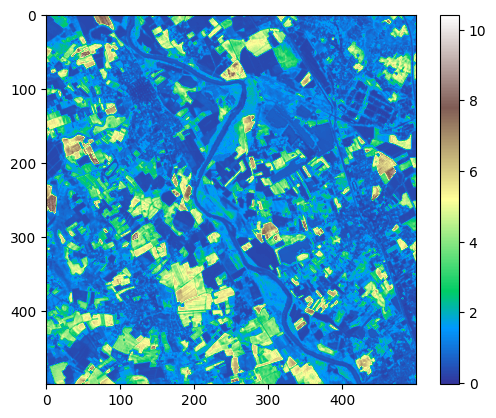

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Open the image
tiff_file =os.path.join("/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData",os.path.relpath(result["output"], "/data"))
img = Image.open(tiff_file)
# Convert the image data to a NumPy array
img_array = np.array(img)

# Plot the image with matplotlib
plt.imshow(img_array, cmap='terrain')
plt.colorbar()
plt.show()


## depai-sam

In [11]:
#testing all the services in the same file
import os, sys, importlib
import geopandas as gpd
import numpy as np
import pytest
import tifffile as tiff
import grpc, pytest


In [12]:
import model_pb2
import model_pb2_grpc


def geographic_to_pixel_bbox(
    bbox_geo: np.array,
    image_width: int,
    image_height: int,
    min_latitude: float,
    max_latitude: float,
    min_longitude: float,
    max_longitude: float,
) -> np.array:
    lat_range = max_latitude - min_latitude
    lon_range = max_longitude - min_longitude
    x_min = ((bbox_geo[:, 0] - min_longitude) / lon_range * image_width).astype(int)
    y_min = ((max_latitude - bbox_geo[:, 3]) / lat_range * image_height).astype(int)
    x_max = ((bbox_geo[:, 2] - min_longitude) / lon_range * image_width).astype(int)
    y_max = ((max_latitude - bbox_geo[:, 1]) / lat_range * image_height).astype(int)
    pixel_bbox = np.column_stack((x_min, y_min, x_max, y_max))
    return pixel_bbox


def geometry_to_xy(gdf):
    list_bboxes = []
    for idx, row in gdf.iterrows():
        x_min, y_min, x_max, y_max = row.geometry.bounds
        list_bboxes.append([x_min, y_min, x_max, y_max])
    return list_bboxes


def check_grpc_sam():
    try:
        # Attempt to connect to the gRPC server
        channel = grpc.insecure_channel('localhost:8062')
        grpc.channel_ready_future(channel).result(timeout=10)  # Wait for the channel to be ready
        return jsonify({"status": "Connected to gRPC server for sam"}), 200
    except Exception as e:
        return jsonify({"status": "Failed to connect to gRPC server", "error": str(e)}), 500

def serviceSam(channel):

    stub = model_pb2_grpc.ImageProcessorStub(channel)

    img_path = "/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_sam/T40RBN_20230607T064629_RGB.tif"
    img = tiff.imread(img_path)
    roi_gdf = gpd.read_file("/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_sam/palm_roi.shp")
    bbox_gdf = gpd.read_file("/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_sam/bbox.shp")
    roi_bbox = geometry_to_xy(roi_gdf)[0]
    list_bboxes = geometry_to_xy(bbox_gdf)
    pixel_bboxes = geographic_to_pixel_bbox(
        np.array(list_bboxes),
        img.shape[1],
        img.shape[0],
        roi_bbox[1],
        roi_bbox[3],
        roi_bbox[0],
        roi_bbox[2],
    )
    pixel_bboxes = pixel_bboxes.tolist()
    data = [
        model_pb2.ImageRequest.Image(  # pylint:disable=E1101
            image_path="/data/data_sam/T40RBN_20230607T064629_RGB.tif",
            bboxes=[
                model_pb2.BoundingBox(  # pylint:disable=E1101
                    x_min=pixel_bboxes[0][0],
                    y_min=pixel_bboxes[0][1],
                    x_max=pixel_bboxes[0][2],
                    y_max=pixel_bboxes[0][3],
                )
            ],
            points=None,
            labels=None,
        )
    ]
    response = stub.ProcessImage(
        model_pb2.ImageRequest(images=data)  # pylint: disable=E1101
    )

    result = {"output": response.entries[0].png_result_path,
               "tif_output": response.entries[0].tif_result_path }

    return response



/mnt/sdd1/vvatellis/storage/DeployAi/webapp/depaiWebApp/pd2Files/model_pb2_grpc.py:21: RuntimeWarning: The grpc package installed is at version 1.64.1, but the generated code in model_pb2_grpc.py depends on grpcio>=1.65.4. Please upgrade your grpc module to grpcio>=1.65.4 or downgrade your generated code using grpcio-tools<=1.64.1. This warning will become an error in 1.66.0, scheduled for release on August 6, 2024.
  warnings.warn(


In [52]:
if __name__ == "__main__":
    channel = grpc.insecure_channel("localhost:8062")
    res = serviceSam(channel)

    result = {"output": res.entries[0].png_result_path,
               "tif_output": res.entries[0].tif_result_path }
    print(result)

{'output': '/data/data_sam/b0491373-275e-4c31-8e42-6477f940c7e2/T40RBN_20230607T064629_RGB.tif_bbox_mask.png', 'tif_output': '/data/data_sam/b0491373-275e-4c31-8e42-6477f940c7e2/T40RBN_20230607T064629_RGB.tif_bbox_mask.tif'}


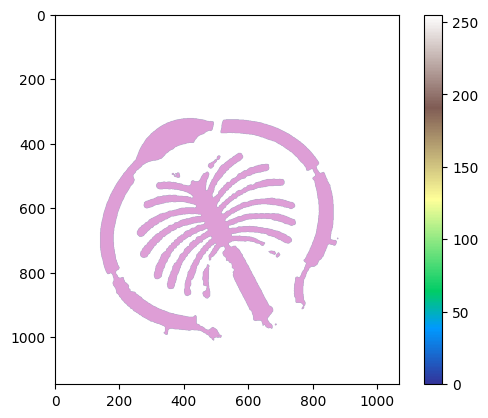

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Open the image
tiff_file =os.path.join("/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData",os.path.relpath(result["output"], "/data"))
img = Image.open(tiff_file)
# Convert the image data to a NumPy array
img_array = np.array(img)

# Plot the image with matplotlib
plt.imshow(img_array, cmap='terrain')
plt.colorbar()
plt.show()

Image dtype: float32
Min value: 0.0, Max value: 255.0


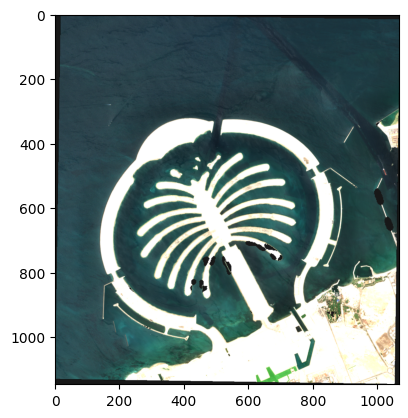

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
import geopandas as gpd

# Load the TIFF image
img_path = "/home/vvatellis/storage/DeployAi/webapp/depaiWebApp/sharedData/data_sam/T40RBN_20230607T064629_RGB.tif"
img = tiff.imread(img_path)

# Check the image dtype and value range
print(f"Image dtype: {img.dtype}")
print(f"Min value: {img.min()}, Max value: {img.max()}")

# Normalize the image to fit in the range [0..1] for floats
if img.dtype == np.float32 or img.dtype == np.float64:
    img_normalized = (img - img.min()) / (img.max() - img.min())  # Normalize to 0-1
    plt.imshow(img_normalized)
    plt.show()
# Rescale the image to fit in the range [0..255] for integers
elif img.dtype == np.uint16 or img.dtype == np.int32:
    img_rescaled = (255 * (img - img.min()) / (img.max() - img.min())).astype(np.uint8)  # Rescale to 0-255
    plt.imshow(img_rescaled)
    plt.show()
else:
    # If the image is already in the correct range (e.g., uint8), display it directly
    plt.imshow(img)
    plt.show()


In [56]:
img_normalized.shape, img_array.shape

((1147, 1068, 3), (1147, 1068, 4))

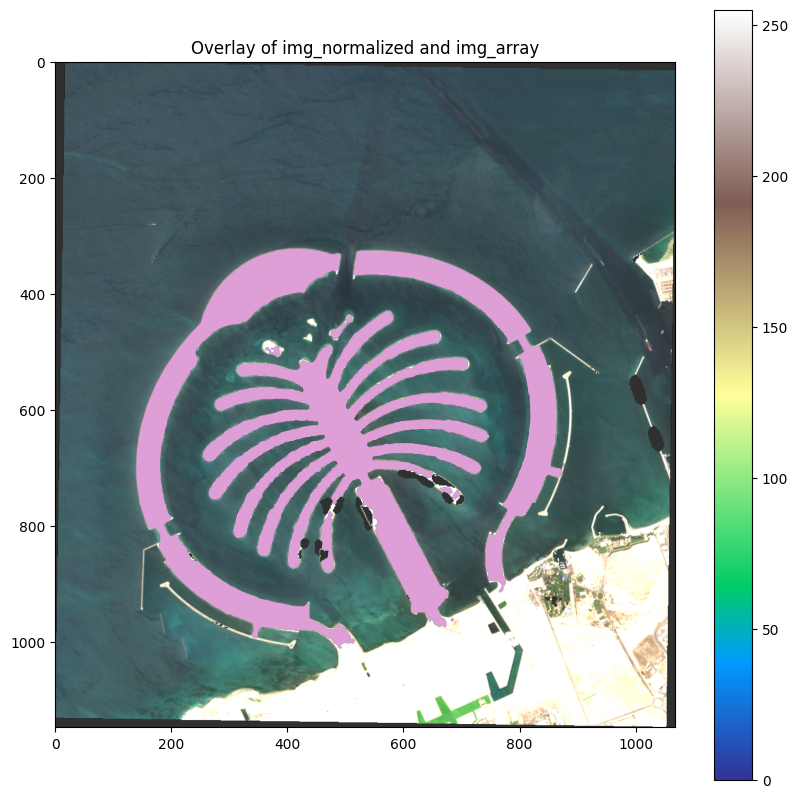

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming img_normalized is a (1147, 1068, 3) RGB image
# and img_array is a (1147, 1068, 4) RGBA image

# First, ensure the images are of the same shape. We need to convert img_normalized to RGBA format.
# Add an alpha channel to img_normalized (assume full opacity)
img_normalized_rgba = np.dstack([img_normalized, np.ones((img_normalized.shape[0], img_normalized.shape[1]))])

# Plot the base image (img_array)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_array)

# Overlay img_normalized_rgba on top with some transparency
ax.imshow(img_normalized_rgba, alpha=0.9)  # Adjust alpha for transparency

# Add a colorbar if needed
plt.colorbar(ax.imshow(img_array, cmap='terrain'), ax=ax)

# Show the plot
plt.title("Overlay of img_normalized and img_array")
plt.show()
